Importing, including things that may not be used so we have full access of options during exploration

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_curve, plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from pandas_profiling import ProfileReport
from category_encoders import OneHotEncoder, OrdinalEncoder
from xgboost import XGBRegressor, XGBClassifier
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot

Making the dataframes, importing the csv and concat, each CSV is in 2 parts
dmg = damage data
kill = kill data
grnd = grenade data
main = main csv with wins, round time, other overall metadata

YOU MUST CHANGE THE DATA TO EITHER YOUR LOCALLY DOWNLOADED LOCATION OR USE KAGGLE'S API!

In [ ]:
dmg = pd.concat([pd.read_csv(r"C:\Work Files\Homework Files\csgo\esea_master_dmg_demos.part1.csv"),pd.read_csv(r"C:\Work Files\Homework Files\csgo\esea_master_dmg_demos.part2.csv")])
kill = pd.concat([pd.read_csv(r"C:\Work Files\Homework Files\csgo\esea_master_kills_demos.part1.csv"),pd.read_csv(r"C:\Work Files\Homework Files\csgo\esea_master_kills_demos.part2.csv")])
grnd = pd.concat([pd.read_csv(r"C:\Work Files\Homework Files\csgo\esea_master_grenades_demos.part1.csv"),pd.read_csv(r"C:\Work Files\Homework Files\csgo\esea_master_grenades_demos.part2.csv")])

In [4]:
main = pd.concat([pd.read_csv(r"C:\Work Files\Homework Files\csgo\esea_meta_demos.part1.csv"),pd.read_csv(r"C:\Work Files\Homework Files\csgo\esea_meta_demos.part2.csv")])

Doing basic exploration

In [3]:
display(dmg.head(),kill.head(),grnd.head(),main.head())

,file,round,tick,seconds,att_team,vic_team,att_side,vic_side,hp_dmg,arm_dmg,...,wp,wp_type,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y
0,esea_match_13770997.dem,1,14372,111.8476,World,Animal Style,None,CounterTerrorist,1,0,...,Unknown,Unkown,0,0,76561198055054795,0,0.0000,0.00000,0.0000,0.000000
1,esea_match_13770997.dem,1,15972,124.3761,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,18,9,...,USP,Pistol,76561198048742997,0,76561198082200410,0,-1499.6900,63.33829,-669.5558,-79.769570
2,esea_match_13770997.dem,1,16058,125.0495,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,100,0,...,USP,Pistol,76561198055054795,0,76561197961009213,0,-1066.8740,3.44563,-614.1868,-91.707770
3,esea_match_13770997.dem,1,16066,125.1121,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,12,7,...,Glock,Pistol,76561198082200410,0,76561198055054795,0,-747.3146,-49.32681,-1065.5560,9.381622
4,esea_match_13770997.dem,1,16108,125.4410,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,15,7,...,USP,Pistol,76561198048742997,0,76561198082200410,0,-1501.8610,49.19798,-748.4188,-53.469220


,file,round,tick,seconds,att_team,vic_team,att_side,vic_side,wp,wp_type,ct_alive,t_alive,is_bomb_planted
0,esea_match_13770997.dem,1,16058,30.74165,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,USP,Pistol,5,4,False
1,esea_match_13770997.dem,1,16210,31.93185,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,4,4,False
2,esea_match_13770997.dem,1,16510,34.28094,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,3,4,False
3,esea_match_13770997.dem,1,17104,38.93212,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,USP,Pistol,3,3,False
4,esea_match_13770997.dem,1,17338,40.76441,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,2,3,False


,file,round,seconds,att_team,vic_team,att_id,vic_id,att_side,vic_side,hp_dmg,...,hitbox,nade,att_rank,vic_rank,att_pos_x,att_pos_y,nade_land_x,nade_land_y,vic_pos_x,vic_pos_y
0,esea_match_13770997.dem,1,153.1602,Animal Style,NaN,76561198165334141,NaN,CounterTerrorist,NaN,0,...,NaN,Smoke,0,NaN,-1618.146,-66.00259,-949.8569,-340.3019,NaN,NaN
1,esea_match_13770997.dem,2,184.7945,Hentai Hooligans,Animal Style,76561198037331400,7.656120e+16,Terrorist,CounterTerrorist,70,...,Generic,HE,0,0.0,-1719.904,-2357.64700,-2774.6650,-1603.9430,-2741.25,-1523.163
2,esea_match_13770997.dem,2,186.8617,Animal Style,NaN,76561198055191021,NaN,CounterTerrorist,NaN,0,...,NaN,HE,0,NaN,-1036.352,492.16760,-466.8676,-356.9641,NaN,NaN
3,esea_match_13770997.dem,2,187.1122,Animal Style,NaN,76561198055054795,NaN,CounterTerrorist,NaN,0,...,NaN,HE,0,NaN,-855.077,438.69090,-459.0147,-543.8581,NaN,NaN
4,esea_match_13770997.dem,2,191.0587,Hentai Hooligans,NaN,76561198037331400,NaN,Terrorist,NaN,0,...,NaN,Molotov,0,NaN,-2617.490,-1832.40700,-2743.5610,-927.2995,NaN,NaN


,file,map,round,start_seconds,end_seconds,winner_team,winner_side,round_type,ct_eq_val,t_eq_val
0,esea_match_13770997.dem,de_overpass,1,94.30782,160.9591,Hentai Hooligans,Terrorist,PISTOL_ROUND,4300,4250
1,esea_match_13770997.dem,de_overpass,2,160.95910,279.3998,Hentai Hooligans,Terrorist,ECO,6300,19400
2,esea_match_13770997.dem,de_overpass,3,279.39980,341.0084,Hentai Hooligans,Terrorist,SEMI_ECO,7650,19250
3,esea_match_13770997.dem,de_overpass,4,341.00840,435.4259,Hentai Hooligans,Terrorist,NORMAL,24900,23400
4,esea_match_13770997.dem,de_overpass,5,435.42590,484.2398,Animal Style,CounterTerrorist,ECO,5400,20550


IF YOU RUN THIS NOTEBOOK LOCALLY UNCOMMENT THE PROFILE REPORT.  IT WAS COMMENTED OUT FOR EASE OF RESTARTING KERNEL.

In [4]:
# ProfileReport(main,explorative=True)

Drop unneeded values: team1/2 is a random selection of ESEA players, and tells us nothing, the other named teams do not appear enough, so drop winner_team.  Minimal data above 30 rounds, which in CS = overtime, drop all overtime rounds.  Drop null values due to extremely low frequency.

Feature engineering: change round start/end to round length, merge equipment value of ct/t team into value difference between team equipment, [round type] should be sufficient for maintaining how much total value is in the total value pool.

In [5]:
main=main[main['round']<31]
main['roundlength']=main['end_seconds']-main['start_seconds']
main['CT_value_advantage']=main['ct_eq_val']-main['t_eq_val']
main.drop(columns=['end_seconds','start_seconds','winner_team','ct_eq_val','t_eq_val'],inplace=True)
main.dropna(axis=0,inplace=True)
main.isnull().sum()

file                  0
map                   0
round                 0
winner_side           0
round_type            0
roundlength           0
CT_value_advantage    0
dtype: int64

In [ ]:
#main.loc[main['winner_side'].shift(1)==1,'wonlastround'] = 1

In [6]:
main.head()

,file,map,round,winner_side,round_type,roundlength,CT_value_advantage
0,esea_match_13770997.dem,de_overpass,1,Terrorist,PISTOL_ROUND,66.65128,50
1,esea_match_13770997.dem,de_overpass,2,Terrorist,ECO,118.44070,-13100
2,esea_match_13770997.dem,de_overpass,3,Terrorist,SEMI_ECO,61.60860,-11600
3,esea_match_13770997.dem,de_overpass,4,Terrorist,NORMAL,94.41750,1500
4,esea_match_13770997.dem,de_overpass,5,CounterTerrorist,ECO,48.81390,-15150


In [6]:
X=main.drop(columns='winner_side')
y=main['winner_side']

In [7]:
Xtrn,Xtst,ytrn,ytst=train_test_split(X,y,test_size=.2,random_state=45)

In [29]:
model=make_pipeline(OrdinalEncoder(),
                    SimpleImputer(),
                    RandomForestClassifier(n_jobs=-1,max_depth=20,random_state=45))
model.fit(Xtrn,ytrn)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['file', 'map', 'round_type'],
                                mapping=[{'col': 'file',
                                          'data_type': dtype('O'),
                                          'mapping': esea_match_13784357.dem        1
esea_match_13825215.dem        2
esea_match_13823399.dem        3
esea_match_13789239.dem        4
esea_match_13825786.dem        5
                           ...  
esea_match_13792484.dem    14918
esea_match_13791080.dem    14919
esea_match_13828176.dem    14920
esea_...
                                         {'col': 'map', 'data_type': dtype('O'),
                                          'mapping': de_inferno     1
de_cache       2
de_mirage      3
de_dust2       4
de_overpass    5
de_train       6
de_cbble       7
de_nuke        8
NaN           -2
dtype: int64},
                                         {'col': 'round_type',
                                          'data_t

In [30]:
model2=make_pipeline(OrdinalEncoder(),
                    SimpleImputer(),
                    GradientBoostingClassifier(n_estimators=135,learning_rate=.1,random_state=45))
model2.fit(Xtrn,ytrn)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['file', 'map', 'round_type'],
                                mapping=[{'col': 'file',
                                          'data_type': dtype('O'),
                                          'mapping': esea_match_13784357.dem        1
esea_match_13825215.dem        2
esea_match_13823399.dem        3
esea_match_13789239.dem        4
esea_match_13825786.dem        5
                           ...  
esea_match_13792484.dem    14918
esea_match_13791080.dem    14919
esea_match_13828176.dem    14920
esea_...
                                         {'col': 'map', 'data_type': dtype('O'),
                                          'mapping': de_inferno     1
de_cache       2
de_mirage      3
de_dust2       4
de_overpass    5
de_train       6
de_cbble       7
de_nuke        8
NaN           -2
dtype: int64},
                                         {'col': 'round_type',
                                          'data_t

In [9]:
Baseline=y.value_counts(normalize=True).max()
print(Baseline)

0.5133420394241108


In [31]:
print(classification_report(ytst,model.predict(Xtst)))
print(accuracy_score(ytst,model.predict(Xtst)))

                  precision    recall  f1-score   support

CounterTerrorist       0.66      0.67      0.67     36197
       Terrorist       0.69      0.68      0.68     38395

        accuracy                           0.67     74592
       macro avg       0.67      0.67      0.67     74592
    weighted avg       0.67      0.67      0.67     74592

0.6740803303303303


In [32]:
print(classification_report(ytst,model2.predict(Xtst)))
print(accuracy_score(ytst,model2.predict(Xtst)))

                  precision    recall  f1-score   support

CounterTerrorist       0.67      0.67      0.67     36197
            None       0.00      0.00      0.00         0
       Terrorist       0.69      0.69      0.69     38395

        accuracy                           0.68     74592
       macro avg       0.45      0.45      0.45     74592
    weighted avg       0.68      0.68      0.68     74592

0.6807432432432432


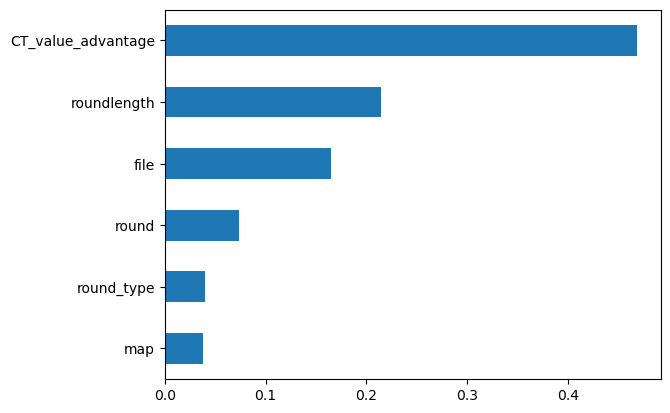

In [33]:
imp = model.named_steps['randomforestclassifier'].feature_importances_
ftr = Xtst.columns
pd.Series(imp,index=ftr).sort_values().plot(kind='barh');
plt.show()

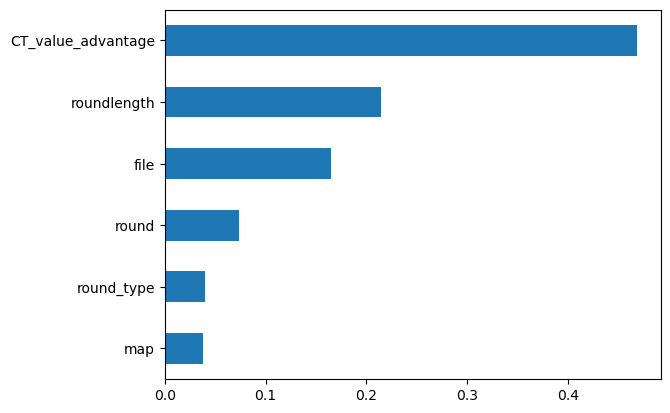

In [34]:
imp2 = model.named_steps['randomforestclassifier'].feature_importances_
ftr = Xtst.columns
pd.Series(imp2,index=ftr).sort_values().plot(kind='barh');
plt.show()

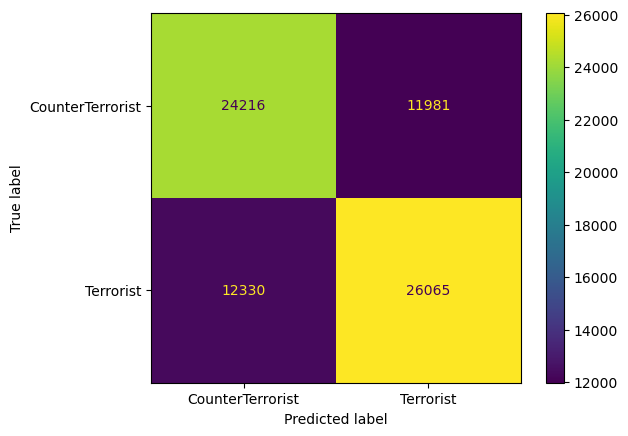

In [35]:
plot_confusion_matrix(model,Xtst,ytst,values_format='.0f')
plt.show()

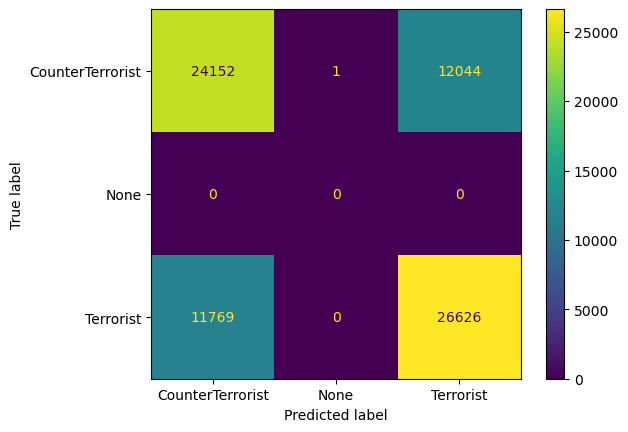

In [36]:
plot_confusion_matrix(model2,Xtst,ytst,values_format='.0f')
plt.show()